Name : Duplicate Question Pair

In [19]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import warnings
warnings.filterwarnings('ignore')

import re
from bs4 import BeautifulSoup

In [20]:
df = pd.read_csv(r"C:\Users\bibhu\Desktop\Python\NLP\Duplicate Question Pairs NLP Project\train.csv\train.csv")

In [21]:
new_df=df.sample(30000,random_state=2)

In [22]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [24]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [25]:
df=df.dropna()

In [26]:
df.duplicated().sum()

0

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

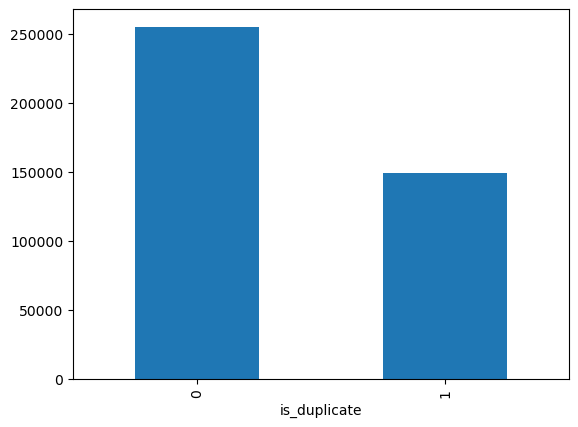

In [27]:
# distribution of questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100))
df['is_duplicate'].value_counts().plot(kind='bar')

In [28]:
#repeated question
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('No. of unique questions',np.unique(qid).shape[0])

x=qid.value_counts()>1
print('No. of repeated questions',x[x].shape[0])

No. of unique questions 537929
No. of repeated questions 111778


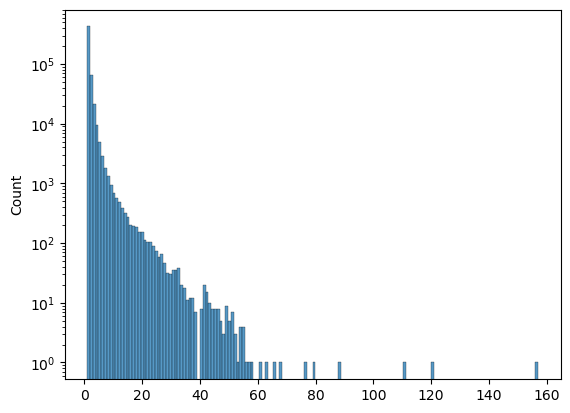

In [29]:
#repeated question
sns.histplot(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [30]:
# pre processing of the dataset
def pre_processing(q):
  q= str(q).lower().strip()
  #replacing special character
  q=q.replace('%'," percent")
  q=q.replace('$'," dollar")
  q=q.replace('₹'," rupee")
  q=q.replace('€'," euro")
  q=q.replace('@'," at")

  #the pattern '[math]' appeares 900 times in the dataset
  q=q.replace('[math]','')

  #replacing soe no.s with string
  q=q.replace(',000,000,000',"b")
  q=q.replace(',000,000',"m")
  q=q.replace(',000',"k")
  q=re.sub(r'([0-9]+)000000000',r'\1b',q)
  q=re.sub(r'([0-9]+)000000',r'\1m',q)
  q=re.sub(r'([0-9]+)000',r'\1k',q)

  #decontracting words
  # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
  # https://stackoverflow.com/a/19794953
  contractions = {
      "ain't": "am not",
      "aren't": "are not",
      "can't": "cannot",
      "can't've": "cannot have",
      "'cause": "because",
      "could've": "could have",
      "couldn't": "could not",
      "couldn't've": "could not have",
      "didn't": "did not",
      "doesn't": "does not",
      "don't": "do not",
      "hadn't": "had not",
      "hadn't've": "had not have",
      "hasn't": "has not",
      "haven't": "have not",
      "he'd": "he would",
      "he'd've": "he would have",
      "he'll": "he will",
      "he'll've": "he will have",
      "he's": "he is",
      "how'd": "how did",
      "how'd'y": "how do you",
      "how'll": "how will",
      "how's": "how is",
      "I'd": "I would",
      "I'd've": "I would have",
      "I'll": "I shall",
      "I'll've": "I shall have",
      "I'm": "I am",
      "I've": "I have",
      "isn't": "is not",
      "it'd": "it would",
      "it'd've": "it would have",
      "it'll": "it will",
      "it'll've": "it will have",
      "it's": "it is",
      "let's": "let us",
      "ma'am": "madam",
      "mayn't": "may not",
      "might've": "might have",
      "mightn't": "might not",
      "mightn't've": "might not have",
      "must've": "must have",
      "mustn't": "must not",
      "mustn't've": "must not have",
      "needn't": "need not",
      "needn't've": "need not have",
      "o'clock": "of the clock",
      "oughtn't": "ought not",
      "oughtn't've": "ought not have",
      "shan't": "shall not",
      "sha'n't": "shall not",
      "shan't've": "shall not have",
      "she'd": "she would",
      "she'd've": "she would have",
      "she'll": "she will",
      "she'll've": "she will have",
      "she's": "she has",
      "should've": "should have",
      "shouldn't": "should not",
      "shouldn't've": "should not have",
      "so've": "so have",
      "so's": "so as",
      "that'd": "that would",
      "that'd've": "that would have",
      "that's": "that is",
      "there'd": "there would",
      "there'd've": "there would have",
      "there's": "there is",
      "they'd": "they would",
      "they'd've": "they would have",
      "they'll": "they will",
      "they'll've": "they will have",
      "they're": "they are",
      "they've": "they have",
      "to've": "to have",
      "wasn't": "was not",
      "we'd": "we would",
      "we'd've": "we would have",
      "we'll": "we will",
      "we'll've": "we will have",
      "we're": "we are",
      "we've": "we have",
      "weren't": "were not",
      "what'll": "what will",
      "what'll've": "what will have",
      "what're": "what are",
      "what's": "what is",
      "what've": "what have",
      "when's": "when is",
      "when've": "when have",
      "where'd": "where did",
      "where's": "where is",
      "where've": "where have",
      "who'll": "who will",
      "who'll've": "who will have",
      "who's": "who is",
      "who've": "who have",
      "why's": "why is",
      "why've": "why have",
      "will've": "will have",
      "won't": "will not",
      "won't've": "will not have",
      "would've": "would have",
      "wouldn't": "would not",
      "wouldn't've": "would not have",
      "y'all": "you all",
      "y'all'd": "you all would",
      "y'all'd've": "you all would have",
      "y'all're": "you all are",
      "y'all've": "you all have",
      "you'd": "you would",
      "you'd've": "you would have",
      "you'll": "you will",
      "you'll've": "you will have",
      "you're": "you are",
      "you've": "you have"
      }
  q_decontracted = []
  for word in q.split():
    if word in contractions:
      word=contractions[word]
    q_decontracted.append(word)

  q=' '.join(q_decontracted)
  q=q.replace("'ve"," have")
  q=q.replace("n't"," not")
  q=q.replace("'re"," are")
  q=q.replace("'ll"," will")

  #removing html tags
  q=BeautifulSoup(q)
  q=q.get_text()

  #removing extra spaces
  q=re.sub("\s+"," ",q)

  #remove punctuations
  pattern=re.compile('\W')
  q=re.sub(pattern,' ',q).strip()

  return q


In [31]:
new_df['question1']=new_df['question1'].apply(pre_processing)
new_df['question2']=new_df['question2'].apply(pre_processing)

In [32]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas tragedy             0

# Feature engineering

In [33]:
# question length feature
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

# no. of words in question
new_df['q1_num_words']=new_df['question1'].apply(lambda x:len(x.split(' ')))
new_df['q2_num_words']=new_df['question2'].apply(lambda x:len(x.split(' ')))


In [34]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
398782      75      76            13            13  
115086      48      56            13            16  
327711     104     119            28            21  
367788      58     145            14            32  
151235      34      49             5             9

In [35]:
# commom words in both questions
def common_words(row):
    w1=set(map(lambda x:x.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda x:x.lower().strip(),row['question2'].split(" ")))
    return len(w1&w2)

new_df['common_words']=new_df.apply(common_words,axis=1)


# Total words
def total_words(row):
    w1=set(map(lambda x:x.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda x:x.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

new_df['total_words']=new_df.apply(total_words,axis=1)

#word share
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)

In [36]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  \
398782      75      76            13            13            12           26   
115086      48      56            13            16             8           24   
327711     104     119            28            21             4           38   
367788      58     145            14            32             1           34   
151235      34      49             5             9             3           13   

        word_share  
398782        0.46  
115086        0.33  
327711        0.11  
367788        0.03  
151235        0.23

# **Advance feature engineering**

### - 1.Token Features

- wc_min: This is the ratio of the number of common words to the length of the smaller question
- wc_max: This is the ratio of the number of common words-to the length of the larger question
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- sc_max: This is the ratio of the number of common stop words to the larger stop.word count among the two questions
- tc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
- tc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
- last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
- first_word_eq: 1 if the first word in the two questions is same, 0 otherwise


In [37]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_token_features(row):
    q1=row['question1']
    q2=row['question2']

    SAFE_DIV=0.0001

    STOP_WORDS=stopwords.words('english')
    token_features=[0.0]*8 # to create 8 new features

    # Converting the Sentence into Tokens:
    q1_tokens=[word.lower() for word in q1.split(' ')]
    q2_tokens=[word.lower() for word in q2.split(' ')]

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    # get the non-stopwords in questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])

    # get stopwords in question
    q1_stops=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops=set([word for word in q2_tokens if word in STOP_WORDS])

    # get the common non-stopwords from question pair
    common_word_count=len(q1_words.intersection(q2_words))

    # get the common stopwords from question pair
    common_stop_count=len(q1_stops.intersection(q2_stops))

    # get the common token from question pair
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)

    #last word of both question are same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

    #first word of both question are same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bibhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
tokenized_features=new_df.apply(fetch_token_features,axis=1)

new_df['cwc_min']=np.array(tokenized_features.tolist())[0:,0]
new_df['cwc_max']=np.array(tokenized_features.tolist())[0:,1]
new_df['csc_min']=np.array(tokenized_features.tolist())[0:,2]
new_df['csc_max']=np.array(tokenized_features.tolist())[0:,3]
new_df['ctc_min']=np.array(tokenized_features.tolist())[0:,4]
new_df['ctc_max']=np.array(tokenized_features.tolist())[0:,5]
new_df['last_word_eq']=np.array(tokenized_features.tolist())[0:,6]
new_df['first_word_eq']=np.array(tokenized_features.tolist())[0:,7]

In [39]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  total_words  \
398782      75      76            13            13  ...           26   
115086      48      56            13            16  ...           24   
327711     104     119            28            21  ...           38   
367788      58     145            14            32  ...           34   
151235      34      49             5             9  ...           13   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782        0.46  0.874989  0.874989  0.999980  0.999980  0.923070   
115086        0.33  0.749981  0.599988  0.714276  0.624992  0.615380   
327711        0.11  0.099999  0.099999  0.428565  0.272725  0.190475   
367788        0.03  0.142855  0.076922  0.000000  0.000000  0.071428   
151235        0.23  0.749981  0.599988  0.000000  0.000000  0.599988   

         ctc_max  last_word_eq  first_word_eq  
398782  0.923070           1.0            1.0  
115086  0.499997           1.0            1.0  
327711  0.142857           0.0            0.0  
367788  0.031250           0.0            0.0  
151235  0.333330           1.0            0.0  

[5 rows x 21 columns]

## 2. Length based feature
- mean_len: Mean of the length of the two questions (number of words)
- abs_len_diff: Absolute difference between the length of the two questions (number of words)
- Iongest_substr_ratlo: Ratio of the length of the longest substring among the'two questions to the length of the smaller question

In [40]:
!pip install Distance

In [41]:
import distance

def fetch_length_features(row):
    q1=row['question1']
    q2=row['question2']

    length_features=[0.0]*3

    #converting the sentence into tokens
    q1_tokens=[word.lower() for word in q1.split(' ')]
    q2_tokens=[word.lower() for word in q2.split(' ')]
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    # Absolute length features
    length_features[0]=abs(len(q1_tokens)-len(q2_tokens))

    #Average token length of both question
    length_features[1]=(len(q1_tokens)+len(q2_tokens))/2

    # longest substring ratio
    strs=list(distance.lcsubstrings(q1,q2))
    if len(strs)==0.0:
      length_features[2]=0
    else:
      length_features[2]=len(strs[0])/(min(len(q1),len(q2))+1)

    return length_features


In [42]:
lenght_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=np.array(lenght_features.tolist())[0:,0]
new_df['mean_len']=np.array(lenght_features.tolist())[0:,1]
new_df['longest_substr_ratio']=np.array(lenght_features.tolist())[0:,2]

In [43]:
new_df.head(2)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
398782      75      76            13            13  ...  0.874989  0.999980   
115086      48      56            13            16  ...  0.599988  0.714276   

         csc_max  ctc_min   ctc_max  last_word_eq  first_word_eq  \
398782  0.999980  0.92307  0.923070           1.0            1.0   
115086  0.624992  0.61538  0.499997           1.0            1.0   

        abs_len_diff  mean_len  longest_substr_ratio  
398782           0.0      13.0              0.855263  
115086           3.0      14.5              0.224490  

[2 rows x 24 columns]

## 3. Fuzzy Features
- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz partial_ratio: fuzz partial ratio from fuzzywuzzy
- token_sort _ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy

In [44]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [45]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1=row['question1']
    q2=row['question2']

    fuzzy_features=[0.0]*4

    #Fuzzy ratio
    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    #Fuzzy partial ratio
    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

    #token sort ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

    # token set ration
    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [46]:
fuzzy_features=new_df.apply(fetch_fuzzy_features,axis=1)

new_df['fuzz_ratio']=np.array(fuzzy_features.tolist())[0:,0]
new_df['fuzz_partial_ratio']=np.array(fuzzy_features.tolist())[0:,1]
new_df['token_sort_ratio']=np.array(fuzzy_features.tolist())[0:,2]
new_df['token_set_ratio']=np.array(fuzzy_features.tolist())[0:,3]

In [47]:
new_df.head(2)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      48      56            13            16  ...  0.499997   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      14.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  

[2 rows x 28 columns]

## EDA on the new features

Min no. of charaters:  2
Max no. of charaters:  397
Avg no. of charaters:  58


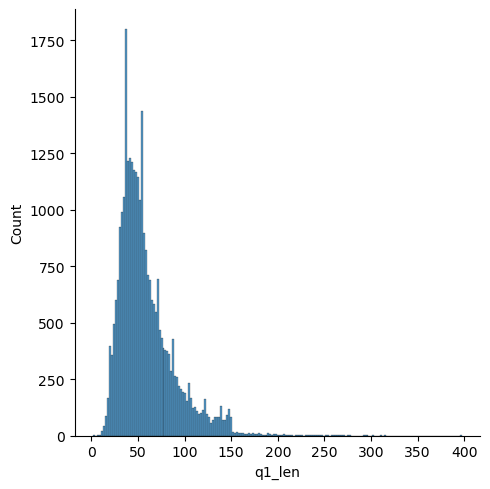

In [48]:
# Analysis of feature
sns.displot(new_df['q1_len'])
print('Min no. of charaters: ',new_df['q1_len'].min())
print('Max no. of charaters: ',new_df['q1_len'].max())
print('Avg no. of charaters: ',int(new_df['q1_len'].mean()))


Min no. of charaters:  0
Max no. of charaters:  1160
Avg no. of charaters:  59


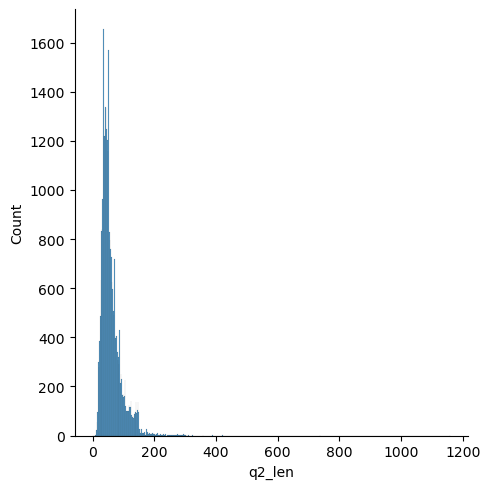

In [49]:
sns.displot(new_df['q2_len'])
print('Min no. of charaters: ',new_df['q2_len'].min())
print('Max no. of charaters: ',new_df['q2_len'].max())
print('Avg no. of charaters: ',int(new_df['q2_len'].mean()))


Min no. of charaters:  1
Max no. of charaters:  79
Avg no. of charaters:  11


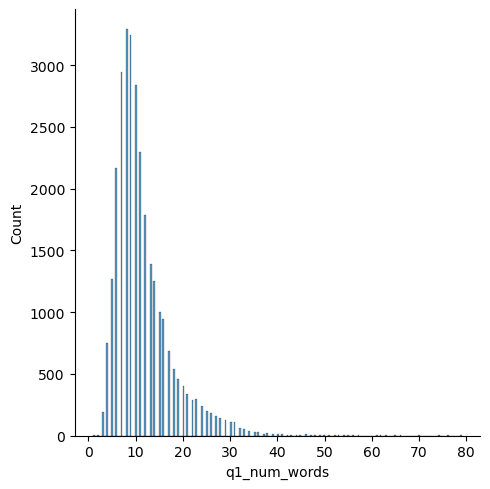

In [50]:
sns.displot(new_df['q1_num_words'])
print('Min no. of charaters: ',new_df['q1_num_words'].min())
print('Max no. of charaters: ',new_df['q1_num_words'].max())
print('Avg no. of charaters: ',int(new_df['q1_num_words'].mean()))


Min no. of charaters:  1
Max no. of charaters:  269
Avg no. of charaters:  11


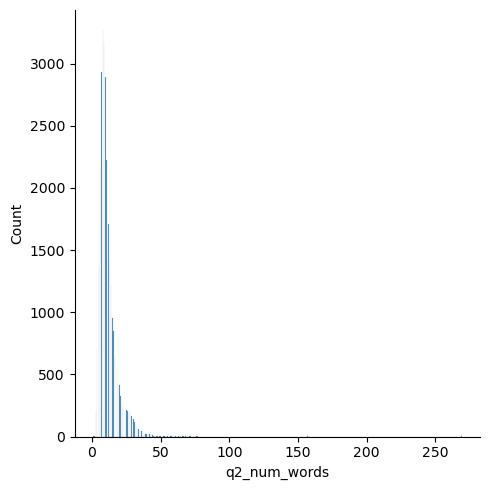

In [51]:
sns.displot(new_df['q2_num_words'])
print('Min no. of charaters: ',new_df['q2_num_words'].min())
print('Max no. of charaters: ',new_df['q2_num_words'].max())
print('Avg no. of charaters: ',int(new_df['q2_num_words'].mean()))

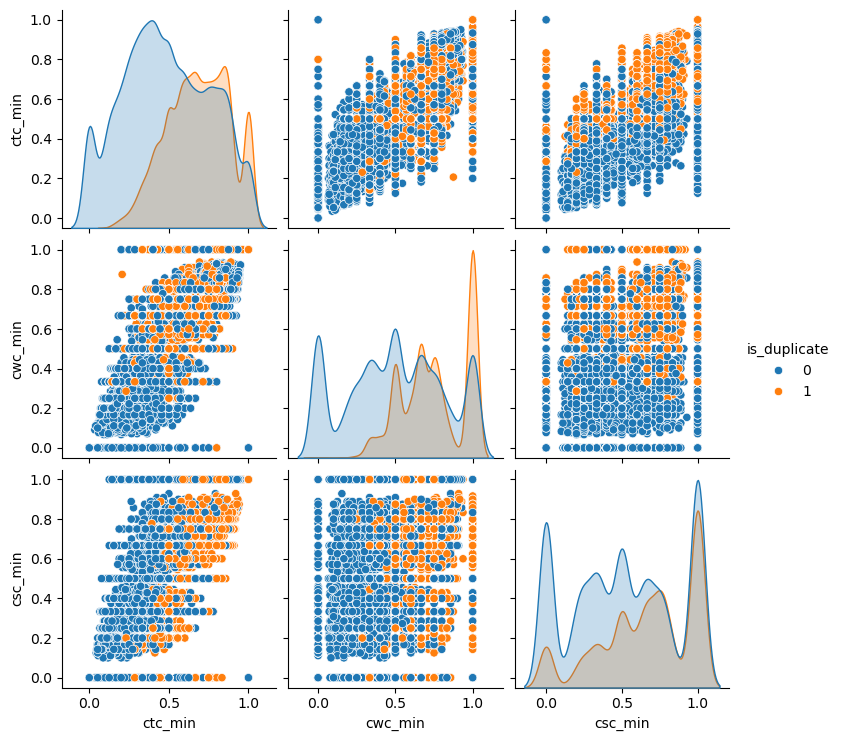

In [27]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

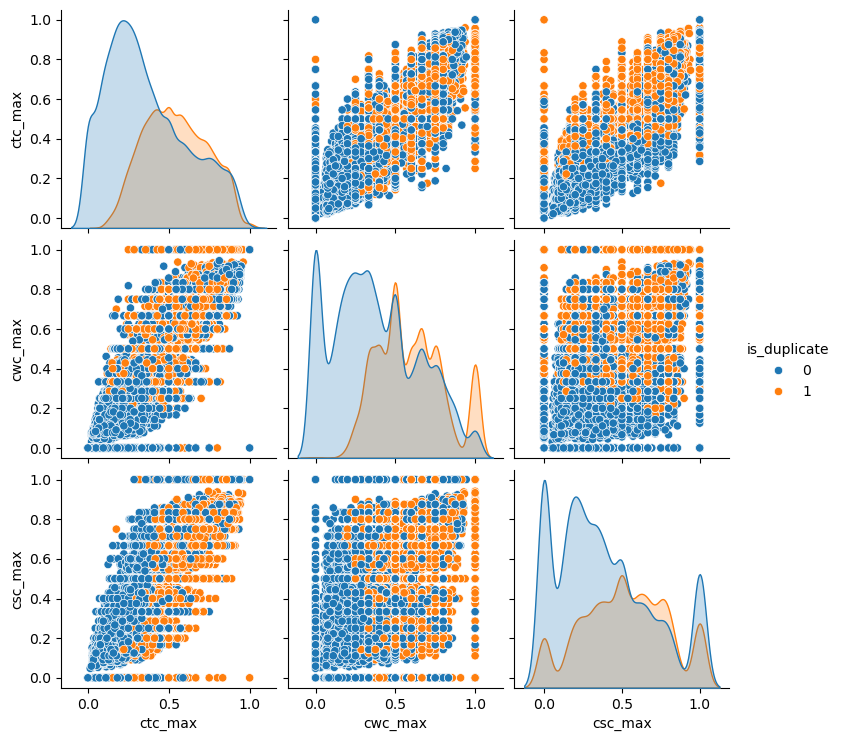

In [28]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

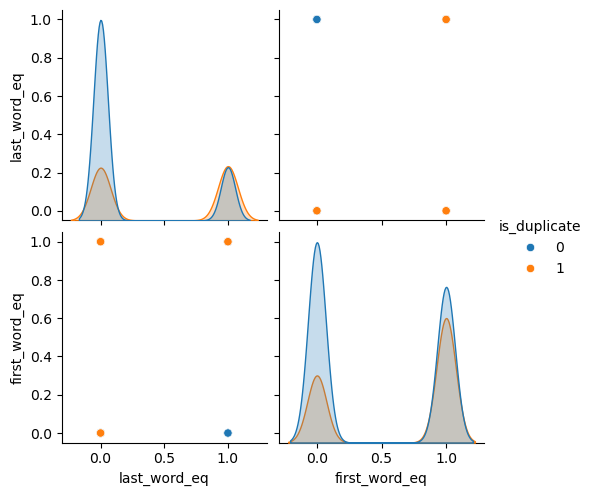

In [29]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

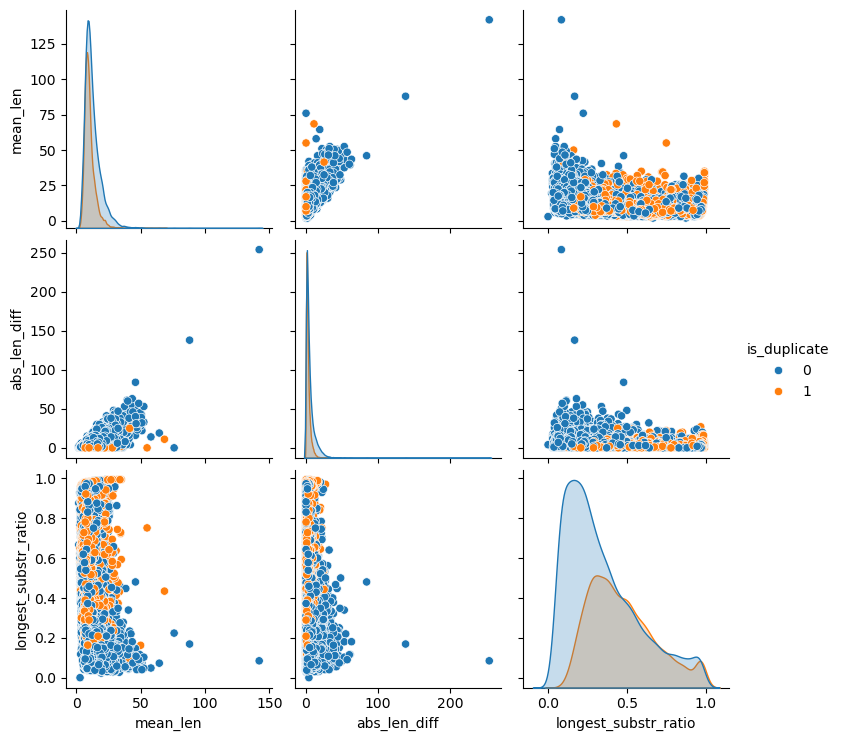

In [30]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')


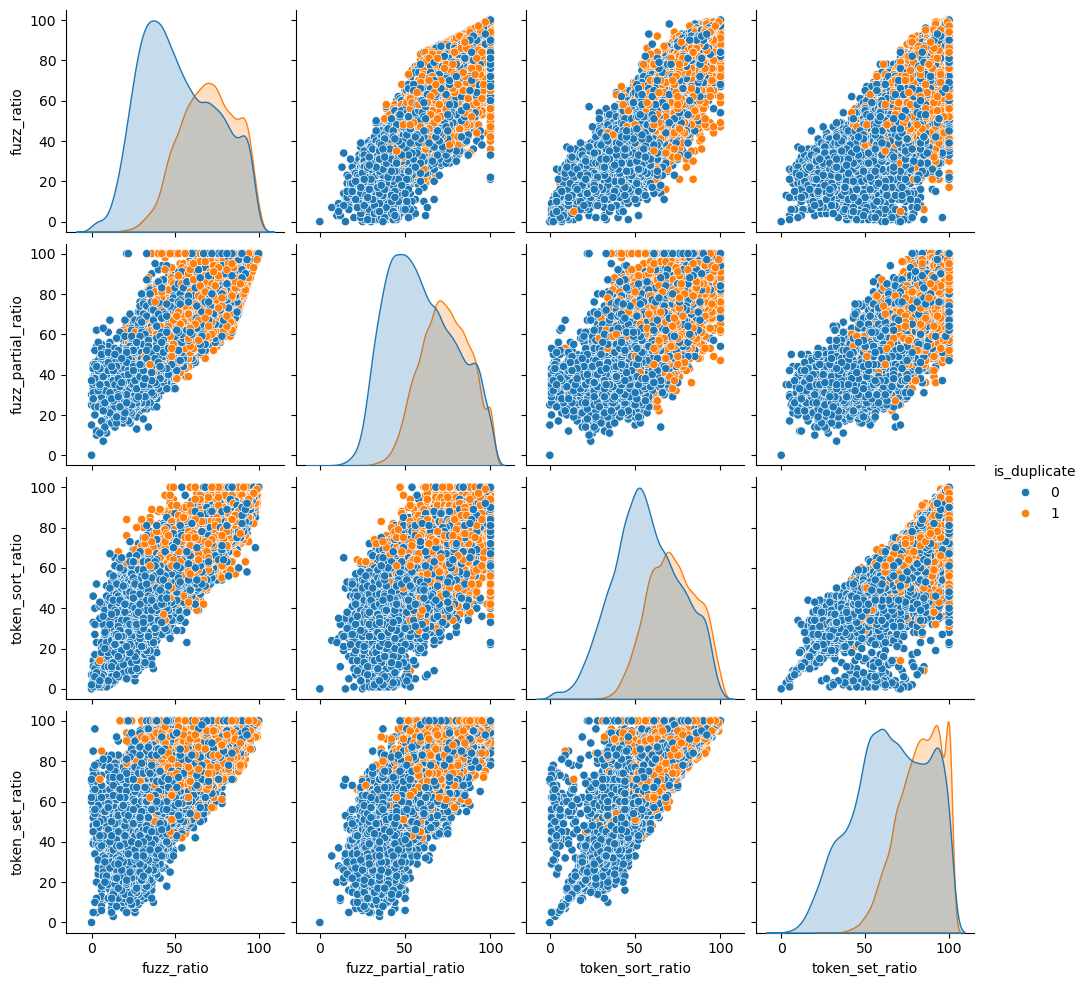

In [31]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [32]:
#using TSNE for dimentionality reduction for  15 features to 3 features
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X=sc.fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']])
y=new_df['is_duplicate'].values

In [33]:
from sklearn.manifold import TSNE

tsne2d=TSNE(n_components=2,
            init='random',
            random_state=101,
            method='barnes_hut',
            n_iter=1000,
            verbose=2,
            angle=0.5).fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.213s...
[t-SNE] Computed neighbors for 30000 samples in 24.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

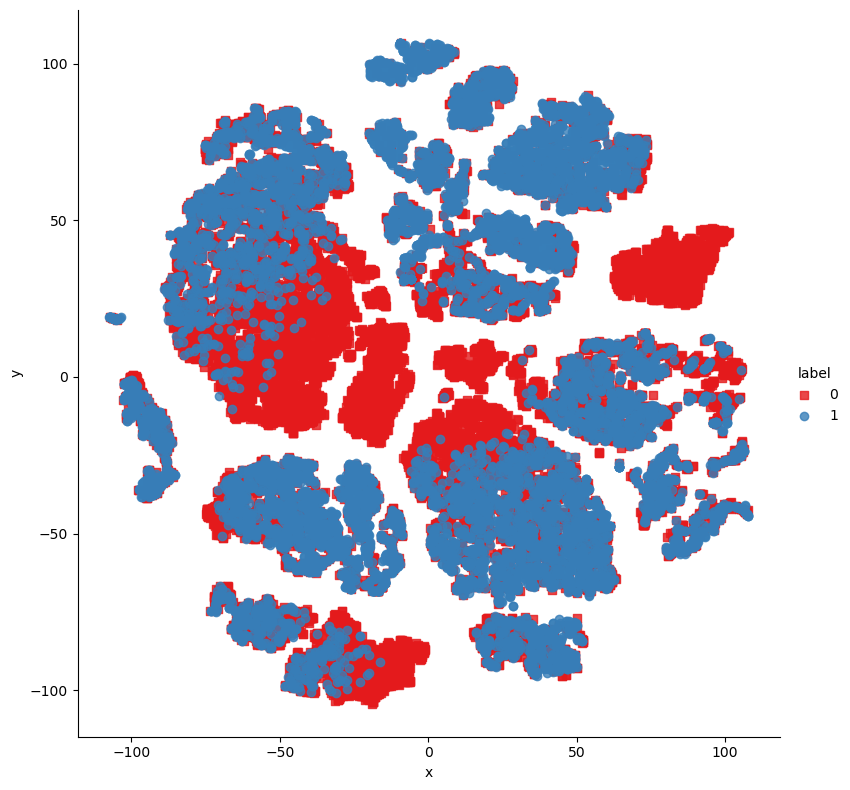

In [34]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,aspect=1,palette="Set1",markers=['s','o'])

In [35]:
tsne3d=TSNE(n_components=3,
            init='random',
            random_state=101,
            method='barnes_hut',
            n_iter=1000,
            verbose=2,
            angle=0.5).fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.216s...
[t-SNE] Computed neighbors for 30000 samples in 23.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

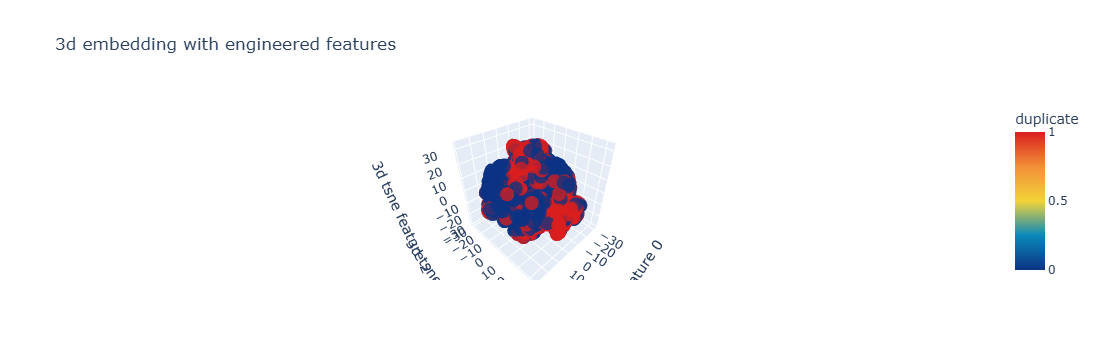

In [36]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace0=go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color=y,
        colorscale='Portland',
        colorbar=dict(title='duplicate'),
        line=dict(color='rgb(255,255,255)'),
        opacity=0.75
    )
)

data=[trace0]
layout=go.Layout(
    title='3d embedding with engineered features',
    scene=dict(
        xaxis=dict(title='3d tsne feature 0'),
        yaxis=dict(title='3d tsne feature 1'),
        zaxis=dict(title='3d tsne feature 2')
    )
)

fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='3d-embedding-plot')

In [37]:
ques_df=new_df[['question1','question2']]
ques_df.head()

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas tragedy

In [38]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
398782             1      75      76            13            13   
115086             0      48      56            13            16   
327711             0     104     119            28            21   
367788             0      58     145            14            32   
151235             0      34      49             5             9   

        common_words  total_words  word_share   cwc_min   cwc_max  ...  \
398782            12           26        0.46  0.874989  0.874989  ...   
115086             8           24        0.33  0.749981  0.599988  ...   
327711             4           38        0.11  0.099999  0.099999  ...   
367788             1           34        0.03  0.142855  0.076922  ...   
151235             3           13        0.23  0.749981  0.599988  ...   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782  0.923070           1.0            1.0           0.0      13.0   
115086  0.499997           1.0            1.0           3.0      14.5   
327711  0.142857           0.0            0.0           7.0      24.5   
367788  0.031250           0.0            0.0          18.0      23.0   
151235  0.333330           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 23 columns]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)

q1_arr=cv.fit_transform(ques_df['question1']).toarray()
q2_arr=cv.transform(ques_df['question2']).toarray()

temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

temp_df.shape

(30000, 6000)

In [40]:
final_df=pd.concat([final_df,temp_df],axis=1)

print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
398782             1      75      76            13            13   
115086             0      48      56            13            16   
327711             0     104     119            28            21   
367788             0      58     145            14            32   
151235             0      34      49             5             9   

        common_words  total_words  word_share   cwc_min   cwc_max  ...  2990  \
398782            12           26        0.46  0.874989  0.874989  ...     0   
115086             8           24        0.33  0.749981  0.599988  ...     0   
327711             4           38        0.11  0.099999  0.099999  ...     0   
367788             1           34        0.03  0.142855  0.076922  ...     0   
151235             3           13        0.23  0.749981  0.599988  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0     0     0  
327711     0     0     0     0     0     0     0     0     0  
367788     0     0     1     0     0     0     0     0     0  
151235     0     0     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

# Model Building

In [41]:
from sklearn.model_selection import train_test_split
X=final_df.drop(columns='is_duplicate').values
y=final_df['is_duplicate'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.788

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3280,  532],
       [ 740, 1448]], dtype=int64)

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 281.8 kB/s eta 0:07:24
   ---------------------------------------- 0.1/124.9 MB 459.5 kB/s eta 0:04:32
   ---------------------------------------- 0.2/124.9 MB 807.1 kB/s eta 0:02:35
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:52
   ---------------------------------------- 0.3/124.9 MB 1.0 MB/s eta 0:02:03
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:50
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 0.7/124.9 MB 1.6 MB/s eta 0:01:20
  

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.789

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3225,  587],
       [ 679, 1509]], dtype=int64)

As the precision is better in case of RF, so we will use RF for final model building

In [49]:
# helping functions for test
def test_common_words(q1,q2):
    w1=set(map(lambda x:x.lower().strip(),q1.split(' ')))
    w2=set(map(lambda x:x.lower().strip(),q2.split(' ')))

    return len(w1&w2)

def test_total_words(q1,q2):
    w1=set(map(lambda x:x.lower().strip(),q1.split(' ')))
    w2=set(map(lambda x:x.lower().strip(),q2.split(' ')))

    return (len(w1)+len(w2))

def test_fetch_token_features(q1,q2):
    SAFE_DIV=0.0001

    STOP_WORDS=stopwords.words('english')
    token_features=[0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens=[word.lower() for word in q1.split(' ')]
    q2_tokens=[word.lower() for word in q2.split(' ')]
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in Questions
    q1_stops=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops=set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count=len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count=len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)

    # Last word of both question is same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

    # First word of both question is same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_features

def test_fetch_length_features(q1,q2):
    length_features=[0.0]*3

    q1_tokens=[word.lower() for word in q1.split(' ')]
    q2_tokens=[word.lower() for word in q2.split(' ')]

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    # Absolute length features
    length_features[0]=abs(len(q1_tokens)-len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1]=(len(q1_tokens)+len(q2_tokens))/2

    # longest substring ratio
    strs=list(distance.lcsubstrings(q1,q2))
    if len(strs)==0.0:
      length_features[2]=0
    else:
      length_features[2]=len(strs[0])/(min(len(q1),len(q2))+1)

    return length_features

def test_fetch_fuzzy_features(q1,q2):
    fuzzy_features=[0.0]*4

    # fuzz_ratio
    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [50]:
#function to identify two question
def query_point_creator(q1,q2):
  input_query=[]

  #preprocessed
  q1=pre_processing(q1)
  q2=pre_processing(q2)

  #basic feature creation
  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split(' ')))
  input_query.append(len(q2.split(' ')))

  input_query.append(test_common_words(q1,q2))
  input_query.append(test_common_words(q1,q2))
  input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

  #token features
  token_features=test_fetch_token_features(q1,q2)
  input_query.extend(token_features)

  #length features
  length_features=test_fetch_length_features(q1,q2)
  input_query.extend(length_features)

  #fuzzy features
  fuzzy_features=test_fetch_fuzzy_features(q1,q2)
  input_query.extend(fuzzy_features)

  #vector features
  q1_arr=cv.transform([q1]).toarray()
  q2_arr=cv.transform([q2]).toarray()

  return np.hstack((np.array(input_query).reshape(1,22),q1_arr,q2_arr))

In [55]:
q1='Where is the capital of India?'
q2='What is the current capital of india?'
q3='Which city serves as the capital of India?'
q4='What is the business capital of India?'

In [56]:
rf.predict(query_point_creator(q1,q2))

array([1], dtype=int64)

In [53]:
query_point_creator(q1,q4)

array([[29., 37.,  6., ...,  0.,  0.,  0.]])

In [54]:
#for model deployment
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))